
# **Objective:**

*   Anak perusahaan PT Taspen (persero) yaitu PT Taspen Property akan membangun sebuah apartemen beranama Aspena Residence, Proyek pembangunan apartemen 612 unit, berlokasi di daerah Jalan Daan Mogot, Tangerang. Apartemen ini menawarkan kehidupan nyaman di tengah kota dengan akses strategis dekat dengan stasiun batu ceper, Bandara Soekarno Hatta, dan pemerintahan daerah. Apartemen ini diprioritaskan untuk Aparatur Sipil Negara (ASN), BUMN dan masyarakat yang membutuhkannya untuk tempat tinggal dan investasi.

*   Maka dari itu perlu pendalaman data untuk memvalidasi serta menemukan potensi dan strategi pemasaran yang efektif, yaitu :
>1.   Validasi potensi market yang ada pada daerah pembangunan dan daerah sekitar yang masih masuk dalam wilayah target market
>2.   Apakah Target market memiliki daya beli yang sejalan dengan harga dari apartemen yang akan dibangun
>3.   Menemukan potensi customer segmentation yang nantinya akan dijadikan dasar rencana strategis pemasaran oleh tim bisnis


# **About organization:**

*   *PT TASPEN (Persero)* or Civil Service Savings and Insurance Fund is an Indonesian State-Owned Enterprise which is engaged in old-age savings insurance and pension funds for ASN and State Officials.

*  *PT Taspen Properti Indonesia* yang sebelumnya bernama PT Arthaloka Indonesia berdiri pada bulan April tahun 1988, di mana sahamnya dimiliki oleh T Taspen (Persero) dan Pemegang Saham lainnya. Saat ini menjalankan bisnis sebagai pengelola gedung Menara Taspen, pengembang pembangunan Apartemen di Batu Ceper Tangerang, serta pembangunan Gedung Iconic di Jalan Jenderal Sudirman


# **Variable Description**

>*   **ID** :unique id peserta.
>*   **NAMA_STATUS_PEGAWAI** : status PNS
>*   **NAMA_STATUS_KAWIN** : status perkawinan
>*   **TAHUN_LAHIR** : tahun lahir peserta
>*   **JENIS_KELAMIN** : jenis kelamin
>*   **JMLISTRI** : jumlah istri
>*   **JMLANAK** : jumlah anak
>*   **THP** : Take home pay (Gapok + Tukin + Tujab)
>*   **TMT_KERJA** : Tahun masuk menjadi PNS
>*   **BUP** : Batas usia pensiun
>*   **NAMA_SATKER** : nama satuan kerja
>*   **NAMA_DATI2** : daerah

In [ ]:
### Data Analysis and Manipulation 
import pandas as pd
import numpy as np

### Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() ## this is for styling

### Data Standardization and Modeling with K-Means and PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
# import data dari csv
df = pd.read_csv('./sample_data/data_peserta_fixs.csv')

In [ ]:
print(f'Total data awal yang digunakan sebanyak {len(df)}')

Total data awal yang digunakan sebanyak 210216


In [ ]:
# show field data
df.columns

Index(['ID_PESERTA', 'NAMA_STATUS_PEGAWAI', 'NAMA_STATUS_KAWIN', 'TAHUN_LAHIR',
       'JENIS_KELAMIN', 'JMLISTRI', 'JMLANAK', 'THP', 'TMT_KERJA', 'BUP',
       'NAMA_SATKER', 'NAMA_DATI2', 'KODE_PANGKAT'],
      dtype='object')

In [ ]:
# show overall info dari data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210216 entries, 0 to 210215
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID_PESERTA           210216 non-null  object
 1   NAMA_STATUS_PEGAWAI  210216 non-null  object
 2   NAMA_STATUS_KAWIN    210216 non-null  object
 3   TAHUN_LAHIR          210216 non-null  int64 
 4   JENIS_KELAMIN        210216 non-null  object
 5   JMLISTRI             210216 non-null  int64 
 6   JMLANAK              210216 non-null  int64 
 7   THP                  210216 non-null  int64 
 8   TMT_KERJA            210216 non-null  object
 9   BUP                  210216 non-null  int64 
 10  NAMA_SATKER          210216 non-null  object
 11  NAMA_DATI2           210216 non-null  object
 12  KODE_PANGKAT         210216 non-null  object
dtypes: int64(5), object(8)
memory usage: 20.8+ MB


# Cleansing & Validating Data

---



In [ ]:
# ubah tipe data TMT_KERJA dtype = object -> datetime
df['TMT_KERJA'] = pd.to_datetime(df['TMT_KERJA'])

In [ ]:
# check top data
df.head(3)

,ID_PESERTA,NAMA_STATUS_PEGAWAI,NAMA_STATUS_KAWIN,TAHUN_LAHIR,JENIS_KELAMIN,JMLISTRI,JMLANAK,THP,TMT_KERJA,BUP,NAMA_SATKER,NAMA_DATI2,KODE_PANGKAT
0,D7F1E7316F97425C1700B06CFB291994,PEGAWAI TETAP,NIKAH,1965,P,1,0,4959460,1985-03-01,58,PUSKESMAS PAMATANG SIDAMANIK,DKI JAKARTA,3D
1,3562F7316F97425C1700B06CFB291994,PEGAWAI TETAP,NIKAH,1973,P,1,2,4311936,2007-01-01,60,BLUD PUSKESMAS PASAR KEMIS,JAKARTA TIMUR,4A
2,529BE2316F97425C1700B06CFB291994,PEGAWAI TETAP,NIKAH,1982,P,1,2,3769410,2009-06-01,58,PUSKESMAS BATUYANG,JAKARTA TIMUR,3D


In [ ]:
# untuk memudahkan dan lebih jelas NAMA_DATI2 diganti ke DAERAH, dan THP (karena disini belum ada tukin dan tujab maka lebih baik diganti ke GAJI_POKOK)
df = df.rename(columns = {'NAMA_DATI2':'DAERAH', 'THP': 'GAJI_POKOK'})
df.columns

Index(['ID_PESERTA', 'NAMA_STATUS_PEGAWAI', 'NAMA_STATUS_KAWIN', 'TAHUN_LAHIR',
       'JENIS_KELAMIN', 'JMLISTRI', 'JMLANAK', 'GAJI_POKOK', 'TMT_KERJA',
       'BUP', 'NAMA_SATKER', 'DAERAH', 'KODE_PANGKAT'],
      dtype='object')

In [ ]:
# karena case yang akan di explore adalah pembangunan apartemen di daerah Tangerang, maka kita akan melihat deskripsi dari data PNS di sekitar jabodetabek
# cek dulu ada daerah apa saja
df.DAERAH.unique()

array(['DKI JAKARTA', 'JAKARTA TIMUR', 'JAKARTA BARAT', 'KAB BOGOR',
       'JAKARTA', 'JAKARTA SELATAN', 'KOTA BEKASI', 'JAKARTA UTARA',
       'BOGOR', 'DEPOK', 'BEKASI', 'KAB KARAWANG', 'TANGGERANG'],
      dtype=object)

karena ada beberapa daerah yang sama tapi memiliki data yang ***berbeda*** maka data akan diupdate :

>*   DKI JAKARTA -> JAKARTA PUSAT
>*   KOTA BEKASI -> BEKASI
>*   KAB BOGOR -> BOGOR
>*   KAB KARAWANG -> KARAWANG

In [ ]:
# karena belum adanya masa kerja dan sisa masa kerja PNS maka dari itu dibutuhkan field usia terlebih dahulu
# dengan asumsi dihitung sampai dengan tahun ini (tidak sampai ke bulan)
df['USIA'] = 2022 - df['TAHUN_LAHIR']

In [ ]:
# cek kembali field USIA yang sudah terbentuk
df.describe()

,TAHUN_LAHIR,JMLISTRI,JMLANAK,GAJI_POKOK,BUP,USIA
count,210216.000000,210216.000000,210216.000000,2.102160e+05,210216.000000,210216.000000
mean,1975.916519,0.760746,1.137506,3.892382e+06,58.499748,46.083481
std,7.801004,0.426629,0.868066,5.401790e+05,3.163503,7.801004
min,1936.000000,0.000000,0.000000,3.000000e+06,0.000000,21.000000
25%,1969.000000,1.000000,0.000000,3.442768e+06,58.000000,40.000000
50%,1976.000000,1.000000,1.000000,3.819872e+06,58.000000,46.000000
75%,1982.000000,1.000000,2.000000,4.310796e+06,60.000000,53.000000
max,2001.000000,1.000000,3.000000,5.000000e+06,70.000000,86.000000


In [ ]:
# dari data diatas masih ditemukan adanya BUP yang dibawah 58
bupZero = df[df['BUP'] < 58] 
print(f'total data BUP = 0 adalah {len(bupZero)}')
bupZero.head()

total data BUP = 0 adalah 702


,ID_PESERTA,NAMA_STATUS_PEGAWAI,NAMA_STATUS_KAWIN,TAHUN_LAHIR,JENIS_KELAMIN,JMLISTRI,JMLANAK,GAJI_POKOK,TMT_KERJA,BUP,NAMA_SATKER,DAERAH,KODE_PANGKAT,USIA
3251,0A6040316F97425C1700B06CFB291994,PEGAWAI TETAP,NIKAH,1966,L,1,1,4704000,2019-11-01,0,PIMPINAN BPK RI,JAKARTA TIMUR,8A,56
3252,2A283A316F97425C1700B06CFB291994,PEGAWAI TETAP,NIKAH,1968,L,0,2,4368000,2019-11-01,0,PIMPINAN BPK RI,JAKARTA,8A,54
3253,B62920316F97425C1700B06CFB291994,PEGAWAI TETAP,NIKAH,1965,P,1,0,4620000,2019-11-01,0,PIMPINAN BPK RI,JAKARTA TIMUR,8A,57
3254,5FAB2B316F97425C1700B06CFB291994,PEGAWAI TETAP,NIKAH,1956,L,1,1,4704000,2019-11-01,0,PIMPINAN BPK RI,JAKARTA TIMUR,8A,66
3255,C810F7316F97425C1700B06CFB291994,PEGAWAI TETAP,NIKAH,1967,L,1,1,4704000,2019-11-01,0,PIMPINAN BPK RI,JAKARTA,8A,55


In [ ]:
# ada 509 data BUP yang kosong tapi dengan TMT_KERJA yang tidak kosong, maka untuk data data ini akan di update menggunakan asumsi mean BUP yaitu 58
df.loc[df['BUP'] < 58, 'BUP'] = 58
bupZero = df[df['BUP'] < 58]
print(f'total data BUP = 0 adalah {len(bupZero)}')

total data BUP = 0 adalah 0


In [ ]:
# count data dengan usia diatas BUP
usiaDiatasBup = df[df['USIA'] > df['BUP']]
len(usiaDiatasBup)

2541

In [ ]:
# exclude data dengan usia diatas BUP
df = df[df['USIA'] < df['BUP']]

In [ ]:
# hitung masa kerja
df['SISA_MASA_KERJA'] = df['BUP'] - df['USIA']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# hitung tahun masuk dan masa kerja
df['TAHUN_MASUK'] = df['TMT_KERJA'].dt.year
df['MASA_KERJA'] = 2022 - df['TAHUN_MASUK']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# validasi kode pangkat
df.KODE_PANGKAT.unique()

array(['3D', '4A', '3A', '2C', '3B', '3C', '2B', '4B', '2D', '2A', '4C',
       '1D', '8A', 'P3', '8D', '09', '8E', '4E', '6D', '10', '4D', '7A',
       '07', '6I'], dtype=object)

In [ ]:
# ada beberapa kode pangkat khusus yang ada diluar kode pangkat ASN normal, kode pangkat ASN normal ada di range 1A - 4E
print(f"data yang memiliki kode pangkat diluar ASN sebanyak : {len(df[df['KODE_PANGKAT'].isin(['8A','7H','P3','8D','7D','09','7E','8E','6D','10','6I','7A','07','P5','P4'])])}")

data yang memiliki kode pangkat diluar ASN sebanyak : 2964


In [ ]:
# exclude kode pangkat khusus
df = df[df['KODE_PANGKAT'].isin(['3D','4A','3A','2C','3B','2B','3C','4B','2A','2D','1D','4E','4D'])]
print(f'Jumlah data setelah cleansing : {len(df)}')

Jumlah data setelah cleansing : 197905


In [ ]:
# karena dibutuhkan data Take Home Pay, dan yang dimiliki hanya field gaji pokok dan belum termasuk dengan tunjangan kinerja dan jabatan
# maka dari itu akan dihitung THP berdasarkan asumsi dari data kementerian keuangan

# create data tunjangan kinerja (tukin) from asumsi data kementerian keuangan
tukinDict = {
  "1A": 1287500 , "1B": 1377500, "1C": 1474000, "1D": 1577000, "2A": 1687500,
  "2B": 1805500, "2C": 1990000, "2D": 2089500, "3A": 2303500, "3B": 2539500,
  "3C": 3737000, "3D": 4229000, "4A": 6185000, "4B": 8350000, "4C": 9440000,
  "4D": 16270000, "4E": 23475000,
}

df['TUKIN'] = df['KODE_PANGKAT']
df['TUKIN'] = df['TUKIN'].map(tukinDict)

# karena data tujab tidak ada maka diasumsikan bahwa tukin = tujab
df['TUJAB'] = df['TUKIN']

# hitung THP
df['THP'] = df['GAJI_POKOK'] + df['TUKIN'] + df['TUJAB']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [ ]:
df.head(2)

,ID_PESERTA,NAMA_STATUS_PEGAWAI,NAMA_STATUS_KAWIN,TAHUN_LAHIR,JENIS_KELAMIN,JMLISTRI,JMLANAK,GAJI_POKOK,TMT_KERJA,BUP,NAMA_SATKER,DAERAH,KODE_PANGKAT,USIA,SISA_MASA_KERJA,TAHUN_MASUK,MASA_KERJA,TUKIN,TUJAB,THP
0,D7F1E7316F97425C1700B06CFB291994,PEGAWAI TETAP,NIKAH,1965,P,1,0,4959460,1985-03-01,58,PUSKESMAS PAMATANG SIDAMANIK,DKI JAKARTA,3D,57,1,1985,37,4229000,4229000,13417460
1,3562F7316F97425C1700B06CFB291994,PEGAWAI TETAP,NIKAH,1973,P,1,2,4311936,2007-01-01,60,BLUD PUSKESMAS PASAR KEMIS,JAKARTA TIMUR,4A,49,11,2007,15,6185000,6185000,16681936


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9d138555d0>,
      dtype=object)

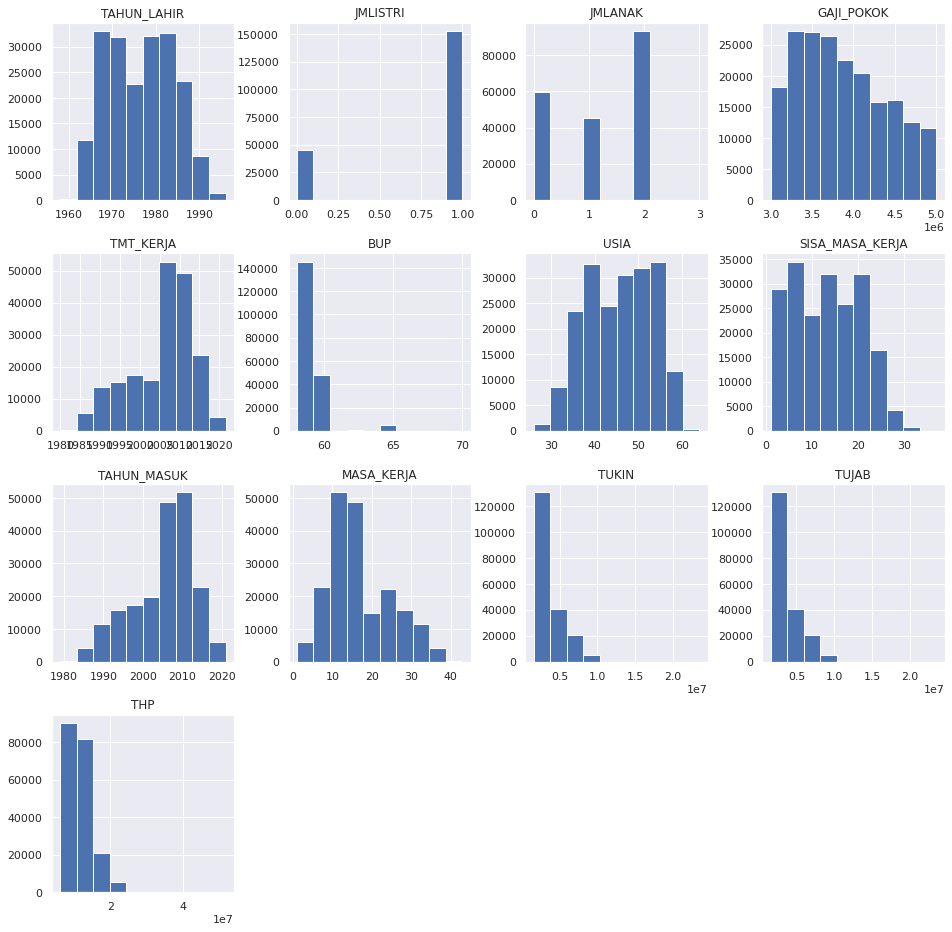

In [ ]:
# kita lihat sebaran data dalam bentuk histogram
df.hist(figsize=(16,16))

Text(0.5, 0, 'Attributes')

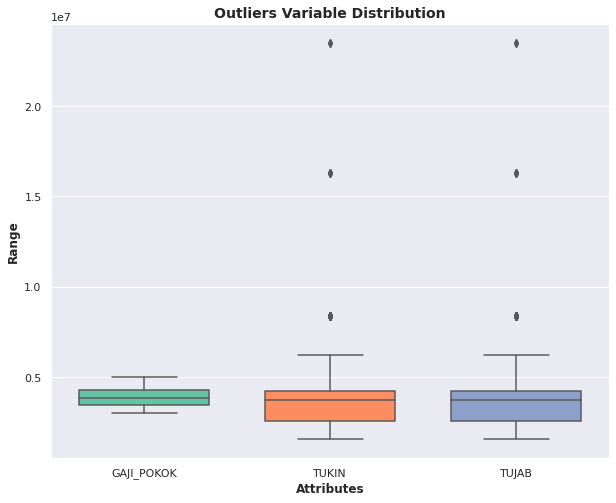

In [ ]:
# Outlier Analysis of Monetary, Frequency and Recency
attributes = ['GAJI_POKOK','TUKIN','TUJAB']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = df[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [ ]:
#Penghapusan data Outlier
# Removing (statistical) outliers for Monetary
Q1 = df.GAJI_POKOK.quantile(0.05)
Q3 = df.GAJI_POKOK.quantile(0.95)
IQR = Q3 - Q1
df = df[(df.GAJI_POKOK >= Q1 - 1.5*IQR) & (df.GAJI_POKOK <= Q3 + 1.5*IQR)]
# Removing (statistical) outliers for Recency
Q1 = df.TUKIN.quantile(0.05)
Q3 = df.TUKIN.quantile(0.95)
IQR = Q3 - Q1
df = df[(df.TUKIN >= Q1 - 1.5*IQR) & (df.TUKIN <= Q3 + 1.5*IQR)]
# Removing (statistical) outliers for Frequency
Q1 = df.TUJAB.quantile(0.05)
Q3 = df.TUJAB.quantile(0.95)
IQR = Q3 - Q1
df = df[(df.TUJAB >= Q1 - 1.5*IQR) & (df.TUJAB <= Q3 + 1.5*IQR)]

In [ ]:
# hitung kembali THP 
df['THP'] = df['GAJI_POKOK'] + df['TUKIN'] + df['TUJAB']

Text(0.5, 0, 'Attributes')

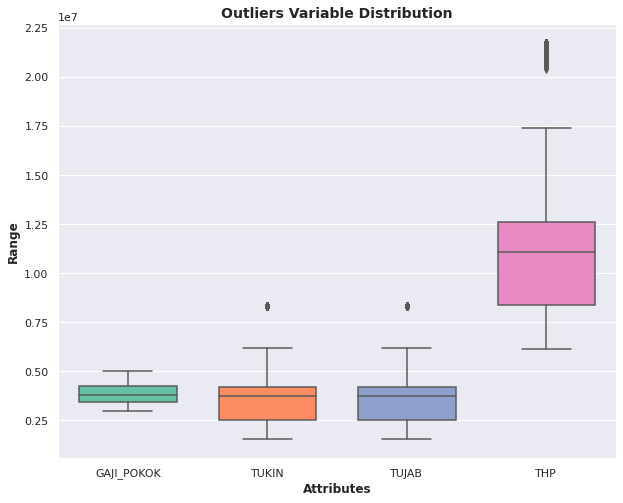

In [ ]:
# Outlier Analysis of Monetary, Frequency and Recency
attributes = ['GAJI_POKOK','TUKIN','TUJAB','THP']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = df[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [ ]:
# checking field dengan tipe categorical / object
# validasi nama status pegawai
df['NAMA_STATUS_PEGAWAI'].unique()

array(['PEGAWAI TETAP', 'PESERTA YG SEDANG VACUM IURAN',
       'DATA YG HARUS DIKONFIRMASI KE INSTANSI',
       'PEGAWAI CUTI DILUAR TANGGUNGAN NEGARA', 'PEGAWAI PENSIUN',
       'PEGAWAI SKORSING', 'PEGAWAI BERALIH KEPESERTAAN',
       'PEGAWAI KELUAR', 'PEGAWAI MENINGGAL'], dtype=object)

In [ ]:
# dari data diatas masih ditemukan ada beberapa status pegawai yang kurang relevan, maka diputuskan untuk mengambil data PEGAWAI TETAP saja
df = df[df['NAMA_STATUS_PEGAWAI'] == 'PEGAWAI TETAP']
df['NAMA_STATUS_PEGAWAI'].unique()

array(['PEGAWAI TETAP'], dtype=object)

# Analisis Data Modeling (K-Means)

---



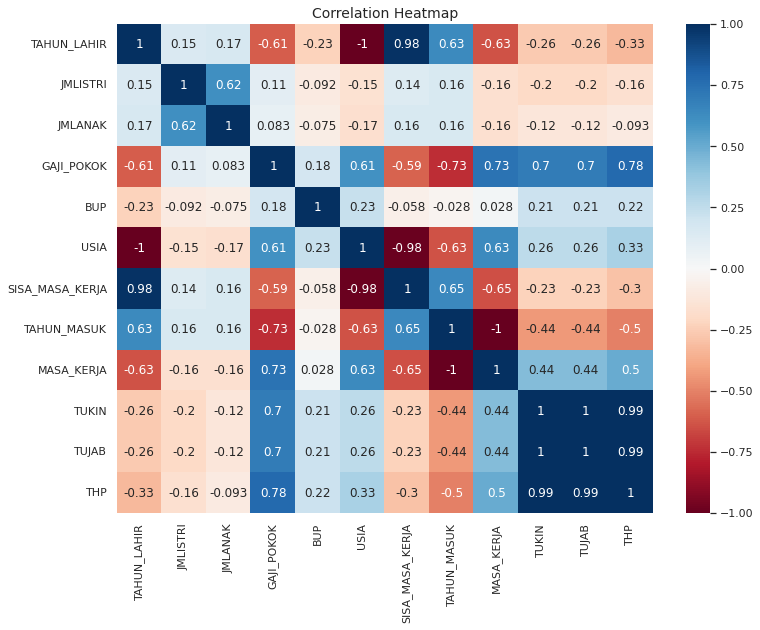

In [ ]:
# check korelasi antar variable
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(),annot=True,cmap='RdBu')
plt.title('Correlation Heatmap',fontsize=14)
plt.yticks(rotation =0)
plt.show()

**Dari data diatas terdapat beberapa correlation positif yaitu THP dengan Masa Kerja dan Usia**

In [ ]:
# THP
df['QTHP'] = pd.cut(df['THP'], 5, labels=["low", "middle-low", "middle", "middle-high", "high"])

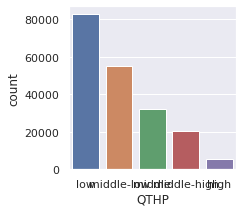

In [ ]:
plt.figure(figsize=(3,3))
p = sns.countplot(x='QTHP', data=df)

In [ ]:
# Usia
df['QUSIA'] = pd.cut(df['USIA'], 3, labels=["young", "middle-age", "older-adulthood"])

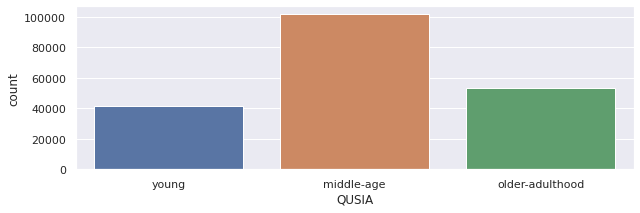

In [ ]:
plt.figure(figsize=(10,3))
p = sns.countplot(x='QUSIA', data=df)

In [ ]:
# Usia
df['QSISA'] = pd.cut(df['SISA_MASA_KERJA'], 3, labels=["short", "medium", "long"])

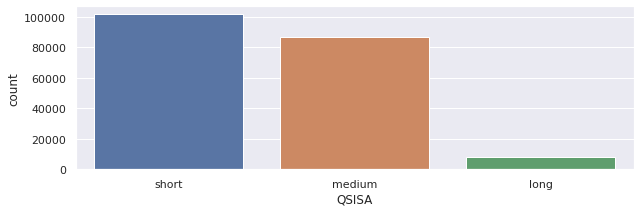

In [ ]:
plt.figure(figsize=(10,3))
p = sns.countplot(x='QSISA', data=df)

In [ ]:
# Masa Kerja
df['QMASAKERJA'] = pd.cut(df['MASA_KERJA'], 3, labels=["long", "medium", "short"])

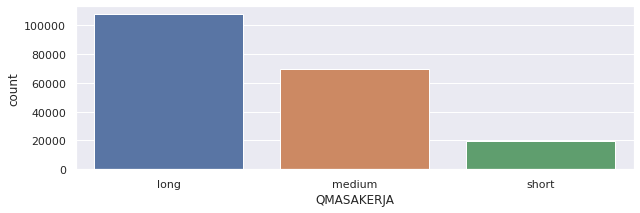

In [ ]:
plt.figure(figsize=(10,3))
p = sns.countplot(x='QMASAKERJA', data=df)

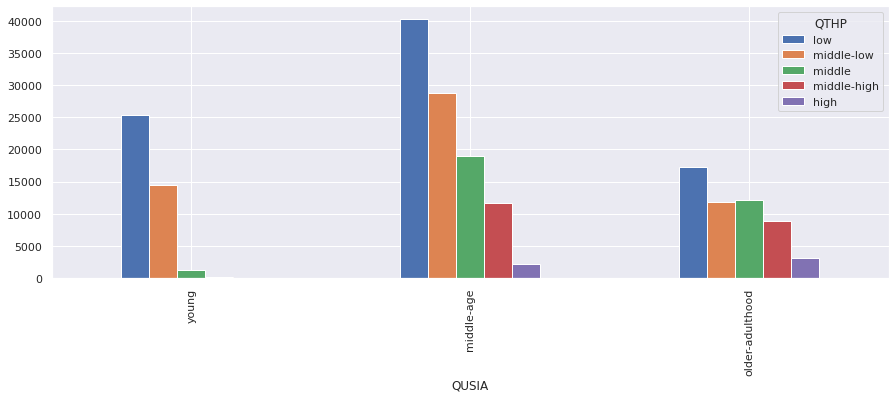

In [ ]:
#Correlation Usia dengan THP
pd.crosstab(df['QUSIA'],df['QTHP']).plot(kind='bar',figsize=(15,5))



1.   Pada USIA yang 'young' tidak terdapat yang memiliki THP 'top'
2.   THP 'top' hanya berada pada USIA 'older-adulthood' & 'middle-age'
3.   Dominasi dari semua kalangan umur adalah THP 'low'

Hal ini sejalan dengan karakteristik hubungan antara THP dan USIA, semakin usianya besar semakin besar juga THPnya



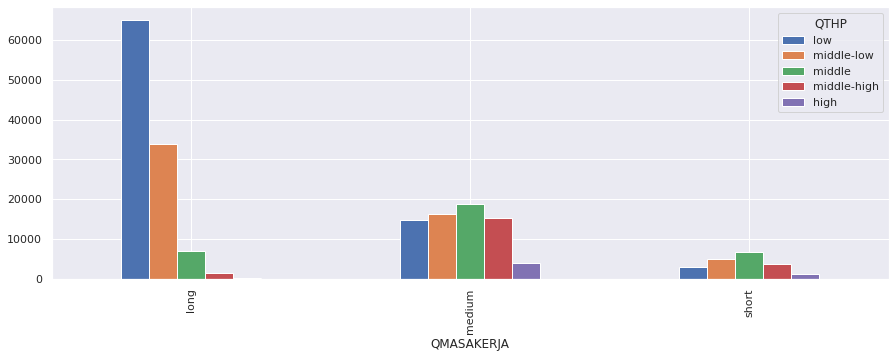

In [ ]:
#Correlation Masa Kerja dengan THP
pd.crosstab(df['QMASAKERJA'],df['QTHP']).plot(kind='bar',figsize=(15,5))

In [ ]:
# Rescaling Atribute
df_scaled = df[['JMLISTRI', 'JMLANAK', 'THP', 'USIA', 'MASA_KERJA']]
# Instantiate
scaler = StandardScaler()
# fit_transform
df_scaled = scaler.fit_transform(df_scaled)
df_scaled.shape

(196389, 5)

In [ ]:
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = ['JMLISTRI', 'JMLANAK', 'THP', 'USIA', 'MASA_KERJA']
df_scaled.head()

,JMLISTRI,JMLANAK,THP,USIA,MASA_KERJA
0,0.543648,-1.360904,0.708521,1.536916,2.547731
1,0.543648,0.961084,1.694767,0.463437,-0.255577
2,0.543648,0.961084,0.348989,-0.744226,-0.510424
3,0.543648,-0.199910,-0.834704,-0.475857,-0.128154
4,-1.839426,-1.360904,0.306539,1.536916,-0.637847


# PCA

---



In [ ]:
pca = PCA()
pca.fit(df_scaled)

PCA()

In [ ]:
pca.explained_variance_ratio_

array([0.44295602, 0.27789845, 0.13819674, 0.07538524, 0.06556354])

Text(0, 0.5, 'Cumulative Explained Variance')

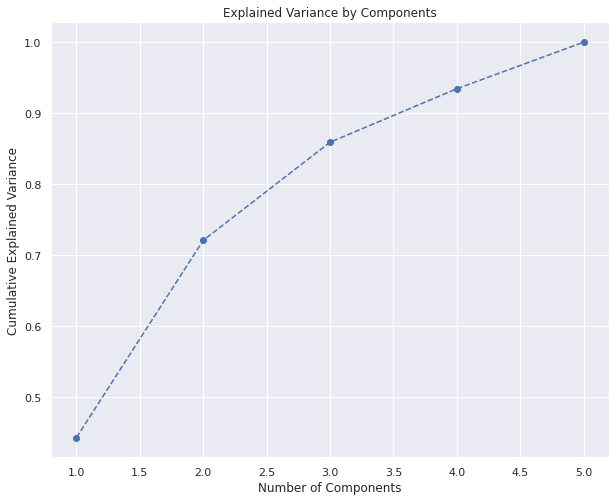

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(range(1,6), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

**80% dengan 3 component**

In [ ]:
pca = PCA(n_components = 3)

In [ ]:
pca.fit(df_scaled)

PCA(n_components=3)

In [ ]:
pca.transform(df_scaled)

array([[ 2.73311198, -0.99295287, -0.84349591],
       [ 0.27085685, -1.44031179,  1.13504587],
       [-1.04937357, -0.62333676,  0.79156174],
       ...,
       [-1.10143058, -0.58341159,  0.497114  ],
       [-2.50115036,  1.24149825,  0.58643193],
       [-2.20540243,  1.05672616,  0.64355549]])

In [ ]:
scores_pca = pca.transform(df_scaled)
scores_pca

array([[ 2.73311198, -0.99295287, -0.84349591],
       [ 0.27085685, -1.44031179,  1.13504587],
       [-1.04937357, -0.62333676,  0.79156174],
       ...,
       [-1.10143058, -0.58341159,  0.497114  ],
       [-2.50115036,  1.24149825,  0.58643193],
       [-2.20540243,  1.05672616,  0.64355549]])

**K-MEANS with PCA**

---



In [ ]:
wcss = []
for i in range (1,11):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state=22)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

<function matplotlib.pyplot.show(*args, **kw)>

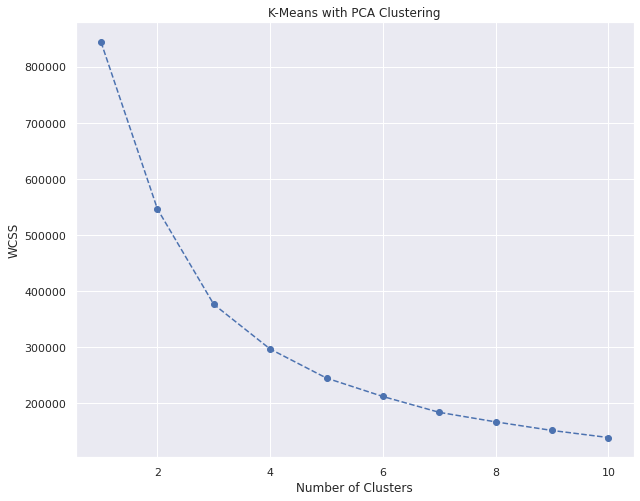

In [ ]:
plt.figure(figsize= (10,8))
plt.plot(range(1,11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-Means with PCA Clustering')
plt.show

In [ ]:
kmeans_pca = KMeans(n_clusters = 3, init = 'k-means++', random_state=22)

In [ ]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=3, random_state=22)

**K-Means clustering with PCA Result**

---



In [ ]:
df_segm_pca_kmeans = pd.concat([df_scaled.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
df_segm_pca_kmeans.columns.values[-3: ] = ['Components 1', 'Components 2', 'Components 3']
df_segm_pca_kmeans['Segment K-Means PCA'] = kmeans_pca.labels_
df_segm_pca_kmeans.head()

,JMLISTRI,JMLANAK,THP,USIA,MASA_KERJA,Components 1,Components 2,Components 3,Segment K-Means PCA
0,0.543648,-1.360904,0.708521,1.536916,2.547731,2.733112,-0.992953,-0.843496,1
1,0.543648,0.961084,1.694767,0.463437,-0.255577,0.270857,-1.440312,1.135046,1
2,0.543648,0.961084,0.348989,-0.744226,-0.510424,-1.049374,-0.623337,0.791562,0
3,0.543648,-0.199910,-0.834704,-0.475857,-0.128154,-0.799156,0.217068,-0.453692,0
4,-1.839426,-1.360904,0.306539,1.536916,-0.637847,1.744976,1.606919,-0.450403,2


In [ ]:
kmeans_ex = KMeans(n_clusters=3).fit(df_scaled)
label_ex = kmeans_ex.labels_
print(label_ex)

[0 0 2 ... 2 2 2]


In [ ]:
df_segm_pca_kmeans['Segment'] = df_segm_pca_kmeans['Segment K-Means PCA'].map({0:'first',1:'Second',3:'Third'})

In [ ]:
df['Cluster'] = df_segm_pca_kmeans['Segment K-Means PCA']

In [ ]:
df['Cluster'].value_counts()

0.0    90574
1.0    54100
2.0    39007
Name: Cluster, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


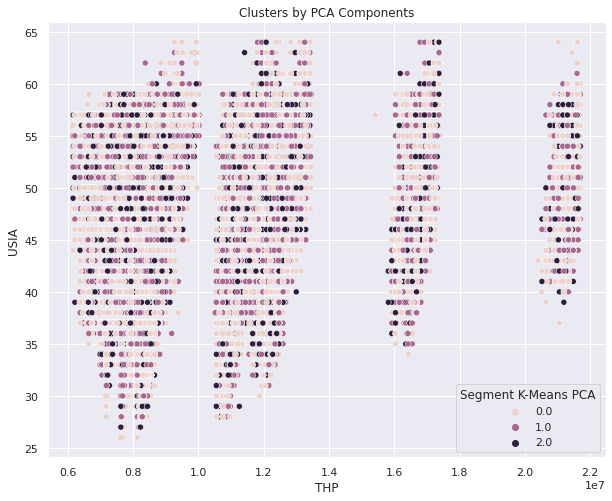

In [ ]:
x_axis = df['THP']
y_axis = df['USIA']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Segment K-Means PCA'])
plt.title('Clusters by PCA Components')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


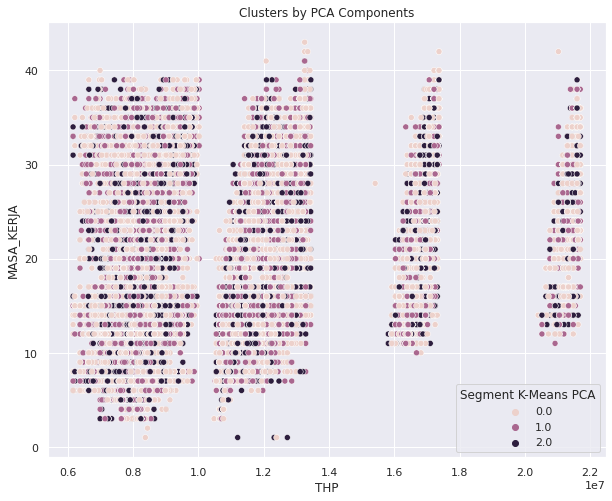

In [ ]:
x_axis = df['THP']
y_axis = df['MASA_KERJA']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Segment K-Means PCA'])
plt.title('Clusters by PCA Components')
plt.show()

# Analisis Data Role Based

---



In [ ]:
new_df = df[['NAMA_STATUS_KAWIN','JENIS_KELAMIN','JMLISTRI','JMLANAK','THP','SISA_MASA_KERJA','USIA']]

**THP Segmentation**

---



In [ ]:
# Calculate THP
new_df['THP'].quantile([0.20, 0.40, 0.60, 0.80])

0.2     8184984.0
0.4     9059480.0
0.6    11443024.0
0.8    12859540.0
Name: THP, dtype: float64

In [ ]:
# THP segmentation using quartile
new_df['T'] = pd.cut(df['THP'], 5, labels=[1, 2, 3, 4, 5]) 
new_df['T'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1    82800
2    55187
3    32394
4    20647
5     5361
Name: T, dtype: int64

In [ ]:
# Group by the T segments
df_T = new_df.groupby(['T']).agg(TotalCustomer=('T', 'count')).reset_index(drop=False)

# Rename the T segments
df_T.loc[df_T['T'] == 1, 'T_group'] = 'Low'
df_T.loc[df_T['T'] == 2, 'T_group'] = 'Medium-Low'
df_T.loc[df_T['T'] == 3, 'T_group'] = 'Medium'
df_T.loc[df_T['T'] == 4, 'T_group'] = 'Medium-High'
df_T.loc[df_T['T'] == 5, 'T_group'] = 'High'

# Calculate the F_group percentage
df_T['T_Percentage'] = round(df_T['TotalCustomer']/df_T['TotalCustomer'].sum() * 100, 2)

# Reorder the columns
df_T = df_T[['T', 'T_group', 'TotalCustomer', 'T_Percentage']]
df_T

,T,T_group,TotalCustomer,T_Percentage
0,1,Low,82800,42.16
1,2,Medium-Low,55187,28.10
2,3,Medium,32394,16.49
3,4,Medium-High,20647,10.51
4,5,High,5361,2.73


**Notes:**

THP in Rupiah (Rp)

1. *High:* THP lebih besar dari 12.859.541. `(> 12,8 Jt)`
2. *Medium-High:* THP antara 11.443.025 dan 12.859.540. `(11,4 - 12,8 Jt)`
3. *Medium:* THP is antara 9.059.481 dan 11.443.024. `(9 - 11,4 Jt)`
4. *Medium-Low:* THP is antara 8.184.984 dan 9.059.480. `(8 - 9 Jt)`
5. *Low:* THP kurang dari 8.184.983. `(< 8 Jt)`

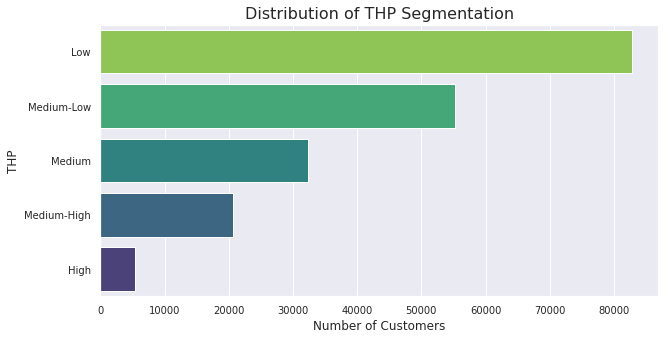

In [ ]:
# Distribution of recency segmentation
plt.figure(figsize=(10, 5))
sns.barplot(y='T_group', x='TotalCustomer', data=df_T, palette='viridis_r')
plt.title('Distribution of THP Segmentation', fontsize=16)
plt.xlabel('Number of Customers', fontsize=12)
plt.ylabel('THP', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10);

**Key Takeaways**

**Berdasarkan grafik di atas, sebagian besar data berada berada di segmen 'Low' (42.16%), maka dapat dikatakan bahwa PNS yang paling banyak adalah PNS yang memiliki gaji dibawah 8 Jt.**

**Sisa Masa Kerja Segmentation**

---



In [ ]:
new_df['SISA_MASA_KERJA'].quantile([0.25, 0.50, 0.75])

0.25     7.0
0.50    13.0
0.75    19.0
Name: SISA_MASA_KERJA, dtype: float64

In [ ]:
# Sisa Masa Kerja segmentation using quartile
new_df['S'] = pd.cut(new_df['SISA_MASA_KERJA'], 3, labels=[1, 2, 3], duplicates='drop')
new_df['S'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1    101800
2     86801
3      7788
Name: S, dtype: int64

In [ ]:
# Group by the M segments
df_S = new_df.groupby(['S']).agg(TotalCustomer=('S', 'count')).reset_index(drop=False)

# Rename the F segments
df_S.loc[df_S['S'] == 1, 'S_group'] = 'Short'
df_S.loc[df_S['S'] == 2, 'S_group'] = 'Middle'
df_S.loc[df_S['S'] == 3, 'S_group'] = 'Long'

# Calculate the F_group percentage
df_S['S_Percentage'] = round(df_S['TotalCustomer']/df_S['TotalCustomer'].sum()*100, 2)

# Reorder the columns
df_S = df_S[['S', 'S_group', 'TotalCustomer', 'S_Percentage']]
df_S

,S,S_group,TotalCustomer,S_Percentage
0,1,Short,101800,51.84
1,2,Middle,86801,44.20
2,3,Long,7788,3.97


**Notes:**

SISA_MASA_KERJA (Tahun)

1. *Short:* SISA_MASA_KERJA kurang dari 7 tahun. `(> 7 tahun)`
2. *Middle:* SISA_MASA_KERJA antara 13 - 19 tahun. `(11 - 19 tahun)`
3. *Long:* SISA_MASA_KERJA diatas 19 Tahun. `(< 19 tahun)`

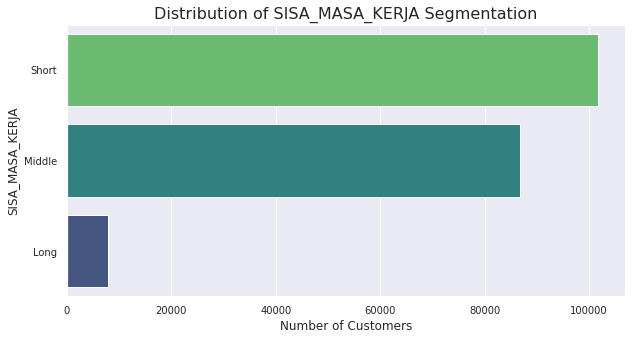

In [ ]:
# Distribution of recency segmentation
plt.figure(figsize=(10, 5))
sns.barplot(y='S_group', x='TotalCustomer', data=df_S, palette='viridis_r')
plt.title('Distribution of SISA_MASA_KERJA Segmentation', fontsize=16)
plt.ylabel('SISA_MASA_KERJA', fontsize=12)
plt.xlabel('Number of Customers', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10);

**Key Takeaways**

**Berdasarkan grafik di atas, dapat dilihat bahwa sebagian besar data berada di segmen 'Short' (51.84%) dimana sisa masa kerja dibawah 7 tahun. namun, selisih antara sisa masa kerja 'short' dan 'middle' juga tidak terlalu jauh.

**Tanggungan Segmentation**

---


diasumsikan bahwa tanggungan biaya hidup berbanding lurus dengan jumlah istri dan anak yang dimiliki, maka dari itu tanggungan biaya hidup akan didefinisikan menggunakan variabel jumlah istri + jumlah anak

In [ ]:
new_df['JUMLAH_TANGGUNGAN'] = new_df['JMLISTRI'] + new_df['JMLANAK']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
new_df['JUMLAH_TANGGUNGAN'].quantile([0.25, 0.50, 0.75])

0.25    1.0
0.50    2.0
0.75    3.0
Name: JUMLAH_TANGGUNGAN, dtype: float64

In [ ]:
# Jumlah tanggungan segmentation using quartile
new_df['TG'] = pd.cut(new_df['JUMLAH_TANGGUNGAN'], 3, labels=[3, 2, 1], duplicates='drop')
new_df['TG'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1    89925
3    62082
2    44382
Name: TG, dtype: int64

In [ ]:
# Group by the M segments
df_TG = new_df.groupby(['TG']).agg(TotalCustomer=('TG', 'count')).reset_index(drop=False)

# Rename the F segments
df_TG.loc[df_TG['TG'] == 1, 'TG_group'] = 'Low'
df_TG.loc[df_TG['TG'] == 2, 'TG_group'] = 'Medium'
df_TG.loc[df_TG['TG'] == 3, 'TG_group'] = 'High'

# Calculate the F_group percentage
df_TG['TG_Percentage'] = round(df_TG['TotalCustomer']/df_TG['TotalCustomer'].sum()*100, 2)

# Reorder the columns
df_TG = df_TG[['TG', 'TG_group', 'TotalCustomer', 'TG_Percentage']]
df_TG

,TG,TG_group,TotalCustomer,TG_Percentage
0,3,High,62082,31.61
1,2,Medium,44382,22.60
2,1,Low,89925,45.79


**Notes:**

**JUMLAH_TANGGUNGAN**

1. *Low:* JUMLAH_TANGGUNGAN dibawah 1. `(1)`
2. *Medium:* JUMLAH_TANGGUNGAN lebih dari 1 sampai dengan kurang dari 3. `(1-3)`
3. *High:* JUMLAH_TANGGUNGAN sama dengan 3. `(3)`

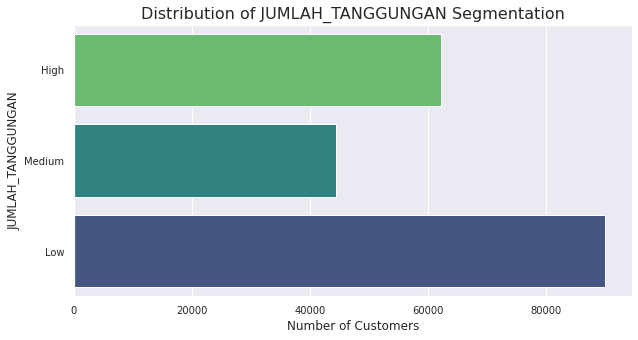

In [ ]:
# Distribution of recency segmentation
plt.figure(figsize=(10, 5))
sns.barplot(y='TG_group', x='TotalCustomer', data=df_TG, palette='viridis_r')
plt.title('Distribution of JUMLAH_TANGGUNGAN Segmentation', fontsize=16)
plt.ylabel('JUMLAH_TANGGUNGAN', fontsize=12)
plt.xlabel('Number of Customers', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10);

**Key Takeaways**

**Berdasarkan grafik di atas, sebagian besar data berada pada segmen 'High' (45.79%), dapat dikatakan bahwa sebagian besar PNS  memiliki jumlah tanggungan sama dengan 3**

In [ ]:
# Calculate RFMSegment and RFMScore
new_df['Segment'] = new_df['T'].astype('string') + new_df['S'].astype('string') + new_df['TG'].astype('string')
new_df['Score'] = new_df['T'].astype('int') + new_df['S'].astype('int') + new_df['TG'].astype('int') 
new_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,NAMA_STATUS_KAWIN,JENIS_KELAMIN,JMLISTRI,JMLANAK,THP,SISA_MASA_KERJA,USIA,T,S,JUMLAH_TANGGUNGAN,TG,Segment,Score,CustomerSegment
0,NIKAH,P,1,0,13417460,1,57,3,1,1,3,313,7,Silver
1,NIKAH,P,1,2,16681936,11,49,4,1,3,1,411,6,Gold
2,NIKAH,P,1,2,12227410,18,40,2,2,3,1,221,5,Silver
3,LAJANG,P,1,1,8309384,16,42,1,2,2,2,122,5,Silver
4,LAJANG,L,0,0,12086900,3,57,2,1,0,3,213,6,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210211,NIKAH,P,1,2,8886942,14,44,1,2,3,1,121,4,Silver
210212,NIKAH,L,1,2,7935914,14,44,1,2,3,1,121,4,Silver
210213,NIKAH,L,1,2,11321842,17,41,2,2,3,1,221,5,Silver
210214,LAJANG,L,1,1,7680840,29,29,1,3,2,2,132,6,Silver


Semakin tinggi Skor, semakin berharga pelanggan. Kombinasi terbaik adalah di mana Segmen adalah `**533**` sehingga Skornya menjadi 11.

In [ ]:
# Grouping customers by RFMScore
new_df.groupby('Score').agg({
    'THP':'mean', 
    'SISA_MASA_KERJA':'mean', 
    'JUMLAH_TANGGUNGAN':['mean', 'count']}).round(2)

THP SISA_MASA_KERJA JUMLAH_TANGGUNGAN       
              mean            mean              mean  count
Score                                                      
3       8173641.36            8.68              3.00  14379
4       8737421.06           14.14              2.78  42072
5      10289419.07           12.95              2.15  51741
6      11606231.57           14.40              1.67  43238
7      12991848.29           14.30              0.99  30369
8      16935846.97            8.57              0.69  10185
9      19966515.42            8.89              0.25   4222
10     20679575.88           17.07              0.26    182
11     21173150.00           28.00              1.00      1

Berdasarkan hasil di atas, kami dapat membagi pelanggan menjadi empat segmen utama, yaitu:

|Segment|Score|
|---|---|
|Bronze|3-4|
|Silver|5-7|
|Gold|8-11|

In [ ]:
# Customer segmentation
def customer_segmentation(i):
    if i <= 4:
        return 'Bronze'
    elif i <=7:
        return 'Silver'
    else:
        return 'Gold'

new_df['CustomerSegment'] = new_df['Score'].apply(customer_segmentation)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
# Customer segmentation mean of each segment
cust_agg = new_df.groupby('CustomerSegment').agg({
    'THP' : 'mean',
    'SISA_MASA_KERJA' : 'mean',
    'JUMLAH_TANGGUNGAN' : 'mean',
    'Segment' : 'count'
}).round(2).sort_values(by='Segment')

cust_agg

,THP,SISA_MASA_KERJA,JUMLAH_TANGGUNGAN,Segment
CustomerSegment,,,,
Gold,17859841.36,8.77,0.56,14590
Bronze,8593817.08,12.75,2.84,56451
Silver,11398383.01,13.78,1.70,125348


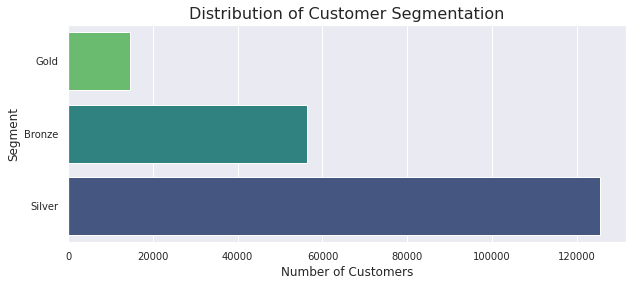

In [ ]:
# Distribution of customer segmentation
plt.figure(figsize=(10, 4))
sns.countplot(y='CustomerSegment', data=new_df, palette='viridis_r', order = cust_agg['Segment'].index)
plt.title('Distribution of Customer Segmentation', fontsize=16)
plt.xlabel('Number of Customers', fontsize=12)
plt.ylabel('Segment', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10);

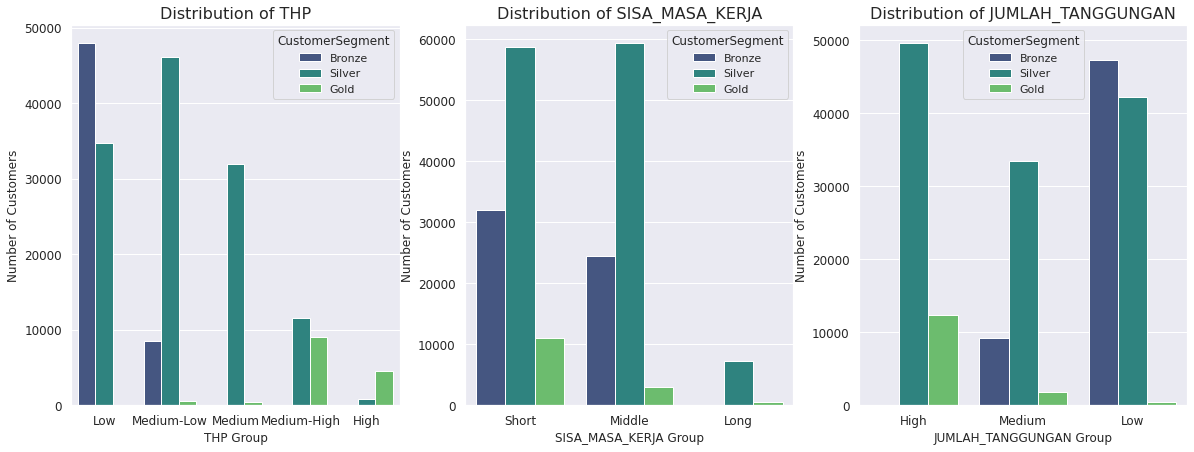

In [ ]:
# Visualization of customer segments vs RFM
segment = ['Bronze', 'Silver', 'Gold']

plt.figure(figsize=(20, 7))

plt.subplot(131)
sns.countplot(x='T', hue='CustomerSegment', data=new_df, hue_order=segment, palette='viridis')
plt.title('Distribution of THP', fontsize=16)
plt.xlabel('THP Group', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(np.arange(5), ['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'], fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(132)
sns.countplot(x='S', hue='CustomerSegment', data=new_df, hue_order=segment, palette='viridis')
plt.title('Distribution of SISA_MASA_KERJA', fontsize=16)
plt.xlabel('SISA_MASA_KERJA Group', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(np.arange(3), ['Short', 'Middle', 'Long'], fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(133)
sns.countplot(x='TG', hue='CustomerSegment', data=new_df, hue_order=segment, palette='viridis')
plt.title('Distribution of JUMLAH_TANGGUNGAN',fontsize=16)
plt.xlabel('JUMLAH_TANGGUNGAN Group', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(np.arange(3), ['High', 'Medium', 'Low'], fontsize=12)
plt.yticks(fontsize=12);

1.   Gold
*   PNS yang memiliki THP tinggi, dengan sisa masa kerja relatif panjang dan dengan jumlah tanggungan yang kecil
2.   Silver
*   PNS yang memiliki THP sedang (medium, medium-high) dengan sisa masa kerja yang relatif sedang dan jumlah tanggungan yang sedang
3.   Bronze
*   PNS yang memiliki THP kecil dengan sisa masa kerja yang relatif pendek dan jumlah tanggungan yang besar





DATA PRICE LIST APARTMENT


---



|Segment|Score|
|---|---|
|𝙎𝙩𝙪𝙙𝙞𝙤|mulai Rp400.528.105,- Jutaan|
|𝟏𝘽𝙍|mulai Rp595.903.625,-Jutaan|
|𝟏𝘽𝙍|Sudut Hug mulai Rp688.367.425,-Jutaan|

1. Validasi potensi market yang ada pada daerah pembangunan dan daerah sekitar yang masih masuk dalam wilayah target market
2. Apakah Target market memiliki daya beli yang sejalan dengan harga dari apartemen yang akan dibangun
3. Menemukan potensi customer segmentation yang nantinya akan dijadikan dasar rencana strategis pemasaran oleh tim bisnis

Jawaban:

> dari analisis yang sudah terbentuk, dapat dikatakan bahwa segmentasi yang terbentuk mayoritas masuk dalam kelompok 'silver' dimana memiliki THP yang relatif tinggi (9-12,8 jt), masa kerja yang relatif sedang yaitu diantara 11 - 19 tahun, dengan tanggungan diantara 1-3 orang. kesimpulan ini dapat dijadikan landasan opini bahwa daerah Daan Mogot, Tangerang cocok untuk dibangun apartemen dengan harga yang ditawarkan. strategis pemasaran yang dapat dilakukan adalah dengan memberlakukan adanya cicilan dengan maksimal cicilan 30% dari total THP.
